In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
all_months_data = pd.DataFrame()
all_csv_files = [file for file in os.listdir("./Sales_Data/")]
for file in all_csv_files:
    df = pd.read_csv(f"./Sales_Data/{file}")
    all_months_data = pd.concat([all_months_data, df], axis=0)
all_months_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [3]:
all_months_data.to_csv("./sales.csv", index=False)

In [55]:
df = pd.read_csv("./sales.csv")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [56]:
df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [57]:
df.shape

(186850, 6)

In [58]:
df = df.dropna(how="any", axis=0)

In [59]:
df.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [60]:
df.shape

(186305, 6)

In [61]:
df.duplicated().sum()

618

In [62]:
duplicates = df[df.duplicated()]
duplicates

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
31,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215"
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1302,177795,Apple Airpods Headphones,1,150,04/27/19 19:45,"740 14th St, Seattle, WA 98101"
1684,178158,USB-C Charging Cable,1,11.95,04/28/19 21:13,"197 Center St, San Francisco, CA 94016"
...,...,...,...,...,...,...
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186738,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186782,259296,Apple Airpods Headphones,1,150,09/28/19 16:48,"894 6th St, Dallas, TX 75001"


In [63]:
df = df.drop_duplicates()

In [64]:
df.duplicated().sum()

0

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185687 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185687 non-null  object
 1   Product           185687 non-null  object
 2   Quantity Ordered  185687 non-null  object
 3   Price Each        185687 non-null  object
 4   Order Date        185687 non-null  object
 5   Purchase Address  185687 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


In [66]:
temp_df=df[df['Order Date'].str[0:2]=='Or']
temp_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [67]:
df = df[df['Order Date'].str[0:2] != 'Or'].copy()

In [68]:
df["Order Date"] = pd.to_datetime(df["Order Date"])

In [69]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"


In [70]:
df.dtypes

Order ID                    object
Product                     object
Quantity Ordered            object
Price Each                  object
Order Date          datetime64[ns]
Purchase Address            object
dtype: object

In [71]:
df["Price Each"] = pd.to_numeric(df["Price Each"])
df["Quantity Ordered"] = pd.to_numeric(df["Quantity Ordered"])

In [72]:
df.dtypes

Order ID                    object
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
dtype: object

In [73]:
neg_price = df.query("`Quantity Ordered` < 0")
neg_price

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [74]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"


In [75]:
df["Month"] = df["Order Date"].dt.month
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4


In [76]:
df.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9
186849,259357,USB-C Charging Cable,1,11.95,2019-09-30 00:18:00,"250 Meadow St, San Francisco, CA 94016",9


In [77]:
df.dtypes

Order ID                    object
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
Month                        int64
dtype: object

In [78]:
df["Sale"] = df["Quantity Ordered"] * df["Price Each"]
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99


In [79]:
df.dtypes

Order ID                    object
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
Month                        int64
Sale                       float64
dtype: object

In [80]:
df = df.rename(columns={"Sale": "Sales"})
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99


In [81]:
monthly_sales = df.groupby("Month")["Sales"].sum().reset_index(name="TotalSales")
monthly_sales

,Month,TotalSales
0,1,1821413.16
1,2,2200078.08
2,3,2804973.35
3,4,3389217.98
4,5,3150616.23
5,6,2576280.15
6,7,2646461.32
7,8,2241083.37
8,9,2094465.69
9,10,3734777.86


In [82]:
monthly_sales_ordered = monthly_sales.sort_values(by="TotalSales", ascending=False).reset_index(drop=True)
monthly_sales_ordered

,Month,TotalSales
0,12,4608295.70
1,10,3734777.86
2,4,3389217.98
3,11,3197875.05
4,5,3150616.23
5,3,2804973.35
6,7,2646461.32
7,6,2576280.15
8,8,2241083.37
9,2,2200078.08


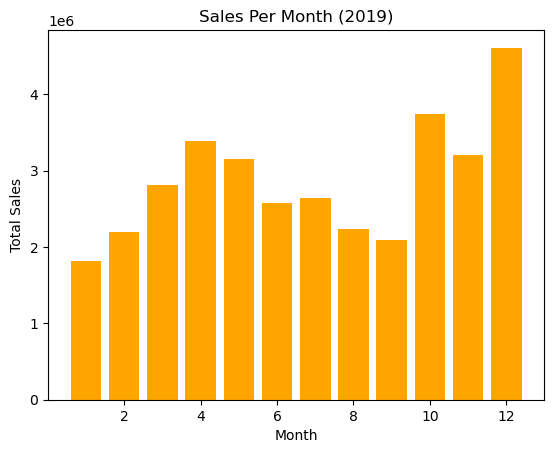

In [83]:
plt.bar(monthly_sales["Month"], monthly_sales["TotalSales"], color="orange")
plt.title("Sales Per Month (2019)")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()

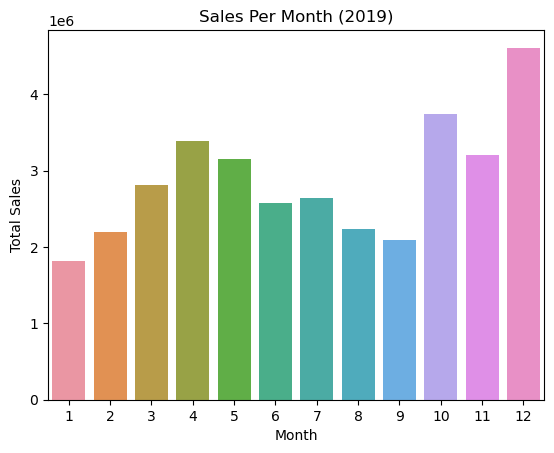

In [84]:
import seaborn as sns
sns.barplot(x="Month", y="TotalSales", data=monthly_sales)
plt.title("Sales Per Month (2019)")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()

In [85]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99


In [86]:
def get_city(address):
    """
    """
    city = address.split(",")[1].strip()
    return city

In [87]:
def get_state(address):
    """
    """
    state = address.split(",")[-1].strip().split(" ")[0].strip()
    return state

In [88]:
df["City"] = df["Purchase Address"].apply(lambda x: f"{get_city(x)} ({get_state(x)})")
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles (CA)
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco (CA)
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco (CA)
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco (CA)


In [89]:
sales_per_city = df.groupby("City")["Sales"].sum().reset_index(name="TotalSales")
sales_per_city

,City,TotalSales
0,Atlanta (GA),2794199.07
1,Austin (TX),1818044.33
2,Boston (MA),3658627.65
3,Dallas (TX),2765373.96
4,Los Angeles (CA),5448304.28
5,New York City (NY),4661867.14
6,Portland (ME),449321.38
7,Portland (OR),1870010.56
8,San Francisco (CA),8254743.55
9,Seattle (WA),2745046.02


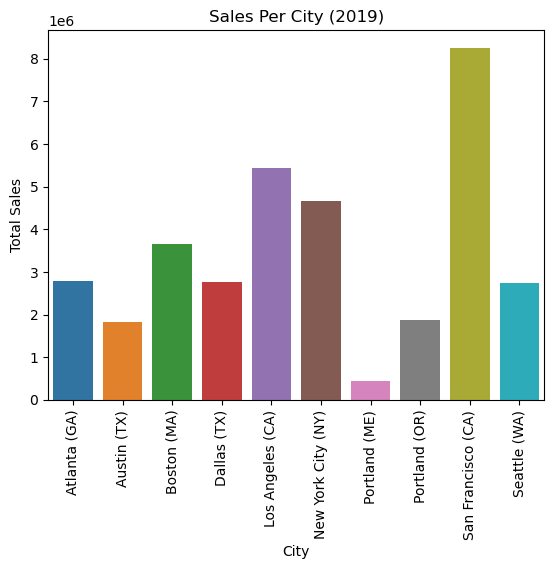

In [90]:
sns.barplot(x="City", y="TotalSales", data=sales_per_city)
plt.title("Sales Per City (2019)")
plt.xlabel("City")
plt.ylabel("Total Sales")
plt.xticks(rotation=90)
plt.show()

In [91]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles (CA)
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco (CA)
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco (CA)
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco (CA)


In [92]:
df.dtypes

Order ID                    object
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
Month                        int64
Sales                      float64
City                        object
dtype: object

In [93]:
df["Hour"] = df["Order Date"].dt.hour
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9
...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles (CA),20
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco (CA),16
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco (CA),7
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco (CA),17


In [94]:
hourly_orders = df.groupby("Hour")["Order ID"].count().reset_index(name="Orders")
hourly_orders

,Hour,Orders
0,0,3902
1,1,2347
2,2,1242
3,3,830
4,4,852
5,5,1320
6,6,2481
7,7,4002
8,8,6252
9,9,8740


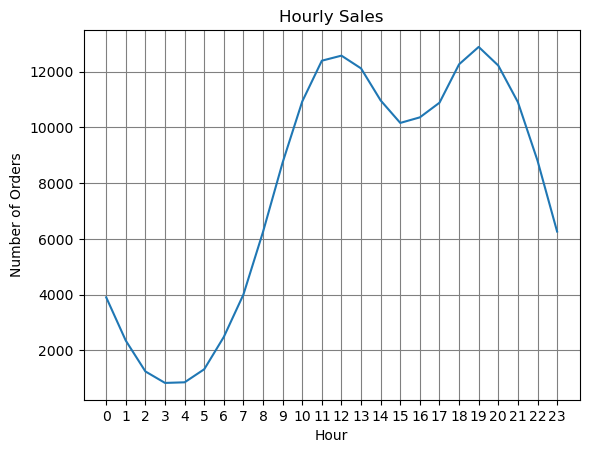

In [95]:
plt.plot(hourly_orders["Hour"], hourly_orders["Orders"])
plt.title("Hourly Sales")
plt.xlabel("Hour")
plt.ylabel("Number of Orders")
plt.xticks(hourly_orders["Hour"].values.tolist())
plt.grid(color="gray")
plt.show()

In [99]:
duplicate_orderIDs = df[df["Order ID"].duplicated(keep=False)].copy()
duplicate_orderIDs

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),19
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles (CA),19
32,176586,AAA Batteries (4-pack),2,2.99,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco (CA),17
...,...,...,...,...,...,...,...,...,...,...
186792,259303,AA Batteries (4-pack),1,3.84,2019-09-20 20:18:00,"106 7th St, Atlanta, GA 30301",9,3.84,Atlanta (GA),20
186803,259314,Wired Headphones,1,11.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,11.99,Atlanta (GA),0
186804,259314,AAA Batteries (4-pack),2,2.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,5.98,Atlanta (GA),0
186841,259350,Google Phone,1,600.00,2019-09-30 13:49:00,"519 Maple St, San Francisco, CA 94016",9,600.00,San Francisco (CA),13


In [100]:
duplicate_orderIDs["Grouped"] = duplicate_orderIDs.groupby("Order ID")["Product"].transform(lambda x: ",".join(x))
duplicate_orderIDs

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Grouped
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),19,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles (CA),19,"Google Phone,USB-C Charging Cable"
32,176586,AAA Batteries (4-pack),2,2.99,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco (CA),17,"AAA Batteries (4-pack),Google Phone"
...,...,...,...,...,...,...,...,...,...,...,...
186792,259303,AA Batteries (4-pack),1,3.84,2019-09-20 20:18:00,"106 7th St, Atlanta, GA 30301",9,3.84,Atlanta (GA),20,"34in Ultrawide Monitor,AA Batteries (4-pack)"
186803,259314,Wired Headphones,1,11.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,11.99,Atlanta (GA),0,"Wired Headphones,AAA Batteries (4-pack)"
186804,259314,AAA Batteries (4-pack),2,2.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,5.98,Atlanta (GA),0,"Wired Headphones,AAA Batteries (4-pack)"
186841,259350,Google Phone,1,600.00,2019-09-30 13:49:00,"519 Maple St, San Francisco, CA 94016",9,600.00,San Francisco (CA),13,"Google Phone,USB-C Charging Cable"


In [101]:
sold_together = duplicate_orderIDs.drop_duplicates(subset=["Order ID", "Grouped"])
sold_together

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Grouped
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),19,"Google Phone,USB-C Charging Cable"
32,176586,AAA Batteries (4-pack),2,2.99,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco (CA),17,"AAA Batteries (4-pack),Google Phone"
119,176672,Lightning Charging Cable,1,14.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4,14.95,New York City (NY),11,"Lightning Charging Cable,USB-C Charging Cable"
129,176681,Apple Airpods Headphones,1,150.00,2019-04-20 10:39:00,"331 Cherry St, Seattle, WA 98101",4,150.00,Seattle (WA),10,"Apple Airpods Headphones,ThinkPad Laptop"
...,...,...,...,...,...,...,...,...,...,...,...
186761,259277,iPhone,1,700.00,2019-09-28 13:07:00,"795 Willow St, New York City, NY 10001",9,700.00,New York City (NY),13,"iPhone,Wired Headphones"
186783,259297,iPhone,1,700.00,2019-09-15 18:54:00,"138 Main St, Boston, MA 02215",9,700.00,Boston (MA),18,"iPhone,Lightning Charging Cable"
186791,259303,34in Ultrawide Monitor,1,379.99,2019-09-20 20:18:00,"106 7th St, Atlanta, GA 30301",9,379.99,Atlanta (GA),20,"34in Ultrawide Monitor,AA Batteries (4-pack)"
186803,259314,Wired Headphones,1,11.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,11.99,Atlanta (GA),0,"Wired Headphones,AAA Batteries (4-pack)"


In [102]:
from itertools import combinations
from collections import Counter

In [103]:
counter = Counter()
for row in sold_together["Grouped"]:
    items = row.split(",")
    combine = combinations(items, 2)
    counter.update(combine)

In [104]:
top_10 = counter.most_common(10)
top_10

[(('iPhone', 'Lightning Charging Cable'), 1002),
 (('Google Phone', 'USB-C Charging Cable'), 985),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 413),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 159),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

In [106]:
most_products = df.groupby("Product")["Quantity Ordered"].sum().reset_index(name="Quantity")
most_products

,Product,Quantity
0,20in Monitor,4126
1,27in 4K Gaming Monitor,6239
2,27in FHD Monitor,7541
3,34in Ultrawide Monitor,6192
4,AA Batteries (4-pack),27615
5,AAA Batteries (4-pack),30986
6,Apple Airpods Headphones,15637
7,Bose SoundSport Headphones,13430
8,Flatscreen TV,4813
9,Google Phone,5529


In [111]:
mean_price = df.groupby("Product")["Price Each"].mean().reset_index(name="MeanPrice")
mean_price

,Product,MeanPrice
0,20in Monitor,109.99
1,27in 4K Gaming Monitor,389.99
2,27in FHD Monitor,149.99
3,34in Ultrawide Monitor,379.99
4,AA Batteries (4-pack),3.84
5,AAA Batteries (4-pack),2.99
6,Apple Airpods Headphones,150.00
7,Bose SoundSport Headphones,99.99
8,Flatscreen TV,300.00
9,Google Phone,600.00


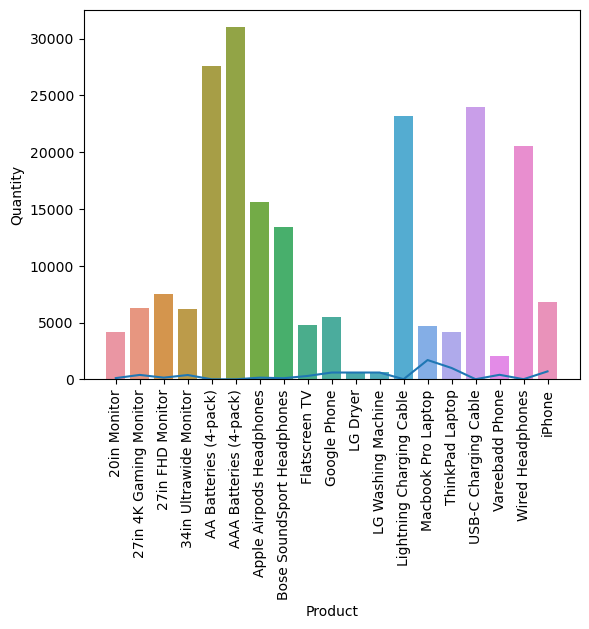

In [114]:
sns.barplot(x="Product", y="Quantity", data=most_products)
sns.lineplot(x="Product", y="MeanPrice", data=mean_price)
plt.xticks(rotation=90)
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_10556\10267049.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(most_products["Product"].values.tolist(), rotation='vertical', size=8)
C:\Users\user\AppData\Local\Temp\ipykernel_10556\10267049.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


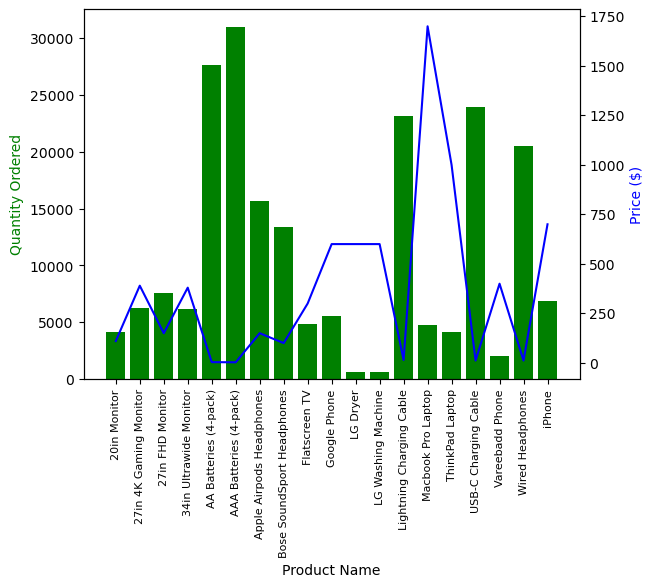

In [115]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(most_products["Product"], most_products["Quantity"], color='g')
ax2.plot(most_products["Product"], mean_price["MeanPrice"], color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(most_products["Product"].values.tolist(), rotation='vertical', size=8)

fig.show()